In [29]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import re
import torch
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import torch

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 'medium'

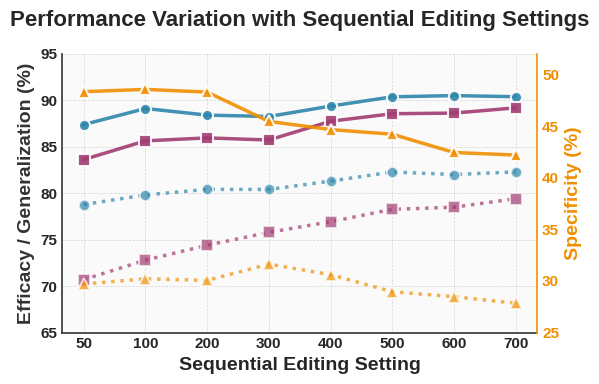

In [ ]:

# 定义数据
settings = ["50", "100", "200", "300", "400", "500", "600", "700"]
models = ["LLaMA-3", "GPT-J"]


efficacy = np.array([
    [87.38, 78.78], [89.11, 79.81], [88.4, 80.41], [88.25, 80.40],
    [89.37, 81.30], [90.37, 82.28], [90.50, 82.01], [90.38,82.29]
])
gen = np.array([
    [83.62,70.70], [85.63,72.79], [85.95,74.40], [85.72,75.78],
    [87.74,76.93], [88.55,78.26], [88.62,78.49], [89.18,79.41]
])
spe = np.array([
    [48.33,29.70], [48.55,30.21], [48.29,30.05], [45.45,31.63],
    [44.66,30.61], [44.21,28.96], [42.44,28.48], [42.19,27.84]
])

# 设置颜色和样式
# 设置更现代的样式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize=(6, 4))

# 优化配色方案 - 使用更专业的颜色
colors = {
    'efficacy': '#2E86AB',      # 深蓝色
    'gen': '#A23B72',            # 紫红色
    'spe': '#F18F01',            # 橙色
}

# 不同模型的线条样式
line_styles = {
    'LLaMA-3': '-',
    'GPT-J': ':'
}

# 标记样式
markers = {
    'efficacy': 'o',
    'gen': 's',
    'spe': '^'
}

# 创建右侧y轴
ax2 = ax1.twinx()

# 绘制 efficacy 和 gen 在左轴，增加线宽和标记大小
for i, model in enumerate(models):
    # Efficacy
    ax1.plot(settings, efficacy[:, i], 
             marker=markers['efficacy'], 
             linestyle=line_styles[model],
             label=f'Efficacy ({model})', 
             color=colors['efficacy'],
             linewidth=2.5,
             markersize=8,
             markeredgewidth=1.5,
             markeredgecolor='white',
             alpha=0.9 if model == 'LLaMA-3' else 0.7)
    
    # Generalization
    ax1.plot(settings, gen[:, i], 
             marker=markers['gen'], 
             linestyle=line_styles[model],
             label=f'Generalization ({model})', 
             color=colors['gen'],
             linewidth=2.5,
             markersize=8,
             markeredgewidth=1.5,
             markeredgecolor='white',
             alpha=0.9 if model == 'LLaMA-3' else 0.7)

# 绘制 spe 在右轴
for i, model in enumerate(models):
    ax2.plot(settings, spe[:, i], 
             marker=markers['spe'], 
             linestyle=line_styles[model],
             label=f'Specificity ({model})', 
             color=colors['spe'],
             linewidth=2.5,
             markersize=8,
             markeredgewidth=1.5,
             markeredgecolor='white',
             alpha=0.9 if model == 'LLaMA-3' else 0.7)

# 设置轴标签 - 增大字体
ax1.set_xlabel("Sequential Editing Setting", fontsize=14, fontweight='bold')
ax1.set_ylabel("Efficacy / Generalization (%)", fontsize=14, fontweight='bold', color='#333')
ax2.set_ylabel("Specificity (%)", fontsize=14, fontweight='bold', color=colors['spe'])

# 设置标题
plt.title("Performance Variation with Sequential Editing Settings", 
          fontsize=16, fontweight='bold', pad=20)

# 设置y轴颜色
ax2.spines['right'].set_color(colors['spe'])
ax2.tick_params(axis='y', colors=colors['spe'], labelsize=11)
ax1.tick_params(axis='both', labelsize=11)

# 设置y轴范围，让数据更清晰
ax1.set_ylim(65, 95)
ax2.set_ylim(25, 52)

# 优化网格
ax1.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
ax2.grid(False)  # 右轴不显示网格，避免混乱

# 优化图例 - 分两列显示，放在更好的位置
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# 创建自定义图例顺序
legend_order = [0, 1, 2, 3, 4, 5]  # 可以调整顺序
all_lines = lines_1 + lines_2
all_labels = labels_1 + labels_2

# ax1.legend([all_lines[i] for i in legend_order], 
#           [all_labels[i] for i in legend_order],
#           loc='upper left', 
#           ncol=2, 
#           fontsize=10,
#           frameon=True,
#           shadow=True,
#           fancybox=True,
#           framealpha=0.95)

# 去除顶部边框
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# 设置边框颜色
for spine in ['left', 'bottom']:
    ax1.spines[spine].set_color('#333')
    ax1.spines[spine].set_linewidth(1.2)

ax2.spines['right'].set_linewidth(1.2)

# 添加背景色渐变效果（可选）
ax1.set_facecolor('#FAFAFA')

plt.tight_layout()
plt.savefig("./figs/analy_performance_variation_seq.pdf", dpi=300, bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

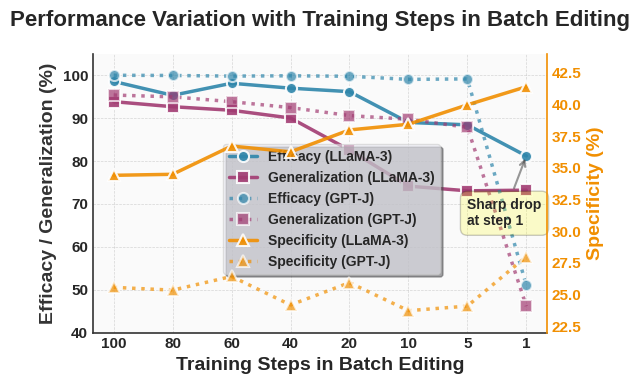

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定义数据
settings = ["100", "80", "60", "40", "20", "10", "5", "1"]
models = ["LLaMA-3", "GPT-J"]

efficacy = np.array([
    [98.55, 99.99], [95.31, 99.94], [98.13, 99.80], [96.98, 99.87],
    [96.17, 99.76], [89.00, 99.03], [88.43, 99.14], [81.18, 51.02]
])
gen = np.array([
    [93.84, 95.38], [92.66, 94.96], [91.83, 93.83], [90.02, 92.45],
    [82.55, 90.59], [74.15, 89.73], [73.05, 87.85], [73.20, 46.16]
])
spe = np.array([
    [34.41, 25.57], [34.49, 25.35], [36.72, 26.43], [36.26, 24.18],
    [37.99, 25.94], [38.44, 23.73], [39.97, 24.09], [41.40, 28.00]
])

# 设置更现代的样式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize=(6, 4))

# 优化配色方案 - 使用专业的颜色
colors = {
    'efficacy': '#2E86AB',      # 深蓝色
    'gen': '#A23B72',            # 紫红色
    'spe': '#F18F01',            # 橙色
}

# 不同模型的线条样式
line_styles = {
    'LLaMA-3': '-',
    'GPT-J': ':'
}

# 标记样式
markers = {
    'efficacy': 'o',
    'gen': 's',
    'spe': '^'
}

# 创建右侧y轴
ax2 = ax1.twinx()

# 绘制 efficacy 和 gen 在左轴，增加线宽和标记大小
for i, model in enumerate(models):
    # Efficacy
    ax1.plot(settings, efficacy[:, i], 
             marker=markers['efficacy'], 
             linestyle=line_styles[model],
             label=f'Efficacy ({model})', 
             color=colors['efficacy'],
             linewidth=2.5,
             markersize=8,
             markeredgewidth=1.5,
             markeredgecolor='white',
             alpha=0.9 if model == 'LLaMA-3' else 0.7)
    
    # Generalization
    ax1.plot(settings, gen[:, i], 
             marker=markers['gen'], 
             linestyle=line_styles[model],
             label=f'Generalization ({model})', 
             color=colors['gen'],
             linewidth=2.5,
             markersize=8,
             markeredgewidth=1.5,
             markeredgecolor='white',
             alpha=0.9 if model == 'LLaMA-3' else 0.7)

# 绘制 spe 在右轴
for i, model in enumerate(models):
    ax2.plot(settings, spe[:, i], 
             marker=markers['spe'], 
             linestyle=line_styles[model],
             label=f'Specificity ({model})', 
             color=colors['spe'],
             linewidth=2.5,
             markersize=8,
             markeredgewidth=1.5,
             markeredgecolor='white',
             alpha=0.9 if model == 'LLaMA-3' else 0.7)

# 设置轴标签 - 增大字体
ax1.set_xlabel("Training Steps in Batch Editing", fontsize=14, fontweight='bold')
ax1.set_ylabel("Efficacy / Generalization (%)", fontsize=14, fontweight='bold', color='#333')
ax2.set_ylabel("Specificity (%)", fontsize=14, fontweight='bold', color=colors['spe'])

# 设置标题
plt.title("Performance Variation with Training Steps in Batch Editing", 
          fontsize=16, fontweight='bold', pad=20)

# 设置y轴颜色
ax2.spines['right'].set_color(colors['spe'])
ax2.tick_params(axis='y', colors=colors['spe'], labelsize=11)
ax1.tick_params(axis='both', labelsize=11)

# 设置y轴范围，让数据更清晰
ax1.set_ylim(40, 105)
ax2.set_ylim(22, 44)

# 优化网格
ax1.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
ax2.grid(False)  # 右轴不显示网格，避免混乱

# 优化图例 - 放在右中位置
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# 创建自定义图例顺序
all_lines = lines_1 + lines_2
all_labels = labels_1 + labels_2

ax1.legend(
    [all_lines[i] for i in legend_order],
    [all_labels[i] for i in legend_order],
    loc='upper right',         # 图内右上角，可改为'upper left'等
    bbox_to_anchor=(0.78, 0.7),  # (x, y)坐标，(1,1)为右上角，(0,0)为左下角
    ncol=1,
    fontsize=10,
    frameon=True,
    shadow=True,
    fancybox=True,
    framealpha=0.6
)

# 去除顶部边框
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# 设置边框颜色
for spine in ['left', 'bottom']:
    ax1.spines[spine].set_color('#333')
    ax1.spines[spine].set_linewidth(1.2)

ax2.spines['right'].set_linewidth(1.2)

# 添加背景色
ax1.set_facecolor('#FAFAFA')

# 添加注释突出显示最后一个点的剧烈变化（可选）
# 为LLaMA-3在训练步数=1时的性能下降添加注释
ax1.annotate('Sharp drop\nat step 1', 
            xy=(7, efficacy[7, 0]), 
            xytext=(6, 65),
            arrowprops=dict(arrowstyle='->', color='#333', lw=1.5, alpha=0.5),
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.2))

plt.tight_layout()
plt.savefig("./figs/analy_performance_variation_batch.pdf", dpi=300, bbox_inches='tight')
plt.show

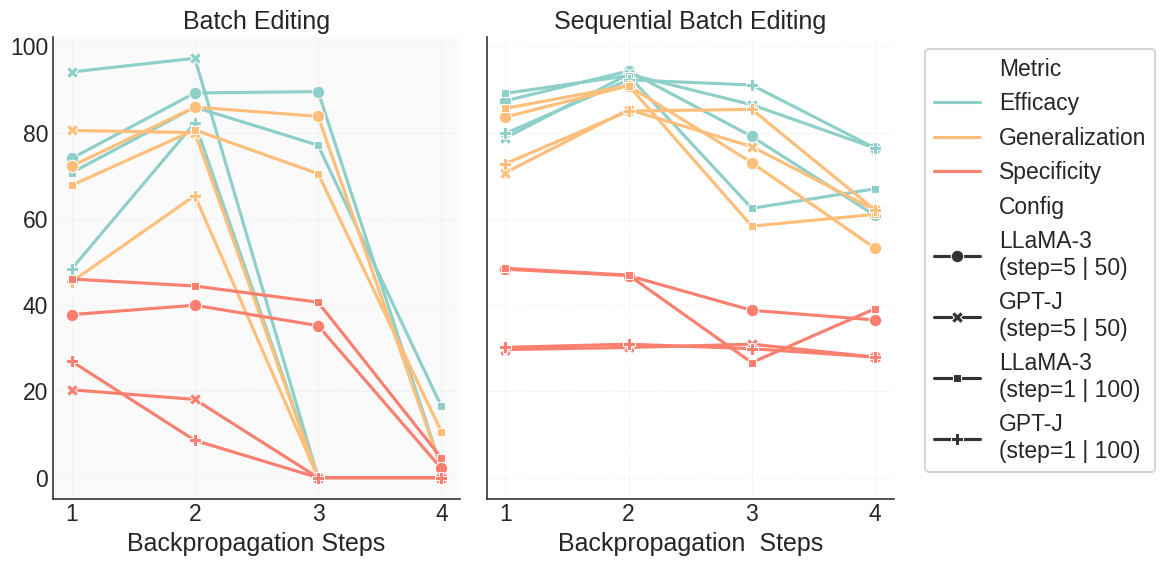

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置样式
sns.set(style="whitegrid", context="talk", palette=["#8ECFC9", "#FFBE7A", "#FA7F6F"])

# --- 数据准备（同你原来的一样） ---
malmen_data = [
    (1, 'LLaMA-3', 5, 74.02, 72.22, 37.80),
    (1, 'GPT-J',   5, 94.08, 80.50, 20.37),
    (1, 'LLaMA-3', 1, 70.70, 67.79, 46.05),
    (1, 'GPT-J',   1, 48.38, 45.41, 26.98),
    (2, 'LLaMA-3', 5, 89.20, 85.91, 39.97),
    (2, 'GPT-J',   5, 97.24, 80.01, 18.14),
    (2, 'LLaMA-3', 1, 85.91, 80.64, 44.44),
    (2, 'GPT-J',   1, 82.28, 65.42,8.63),
    (3, 'LLaMA-3', 5, 89.52, 83.79, 35.24),
    (3, 'GPT-J',   5, 0.0, 0, 0),
    (3, 'LLaMA-3', 1, 77.08, 70.48, 40.67),
    (3, 'GPT-J',   1, 0, 0, 0),
    (4, 'LLaMA-3', 5,2.2, 2.24, 2.12),
    (4, 'GPT-J',   5, 0.0, 0.0, 0),
    (4, 'LLaMA-3', 1, 16.51, 10.65, 4.54),
    (4, 'GPT-J',   1, 0, 0,0),
]
malmen_df = pd.DataFrame(malmen_data, columns=['iter', 'model', 'train_step', 'Efficacy', 'Generalization', 'Specificity'])
malmen_long = malmen_df.melt(
    id_vars=['iter', 'model', 'train_step'],
    value_vars=['Efficacy', 'Generalization', 'Specificity'],
    var_name='Metric', value_name='value'
)
malmen_long['Config'] = malmen_long['model'] + ' (step=' + malmen_long['train_step'].astype(str) + ')'

rledit_data = [
    (1, 'LLaMA-3', 'step=5 | 50', 87.38, 83.62, 48.33),
    (1, 'GPT-J',   'step=5 | 50', 78.78, 70.70, 29.70),
    (1, 'LLaMA-3', 'step=1 | 100', 89.11, 85.63, 48.55),
    (1, 'GPT-J',   'step=1 | 100', 79.81, 72.79, 30.21),
    (2, 'LLaMA-3', 'step=5 | 50', 94.29, 90.86, 46.84),
    (2, 'GPT-J',   'step=5 | 50', 93.53, 85.36, 30.18),
    (2, 'LLaMA-3', 'step=1 | 100', 93.22, 90.92, 46.96),
    (2, 'GPT-J',   'step=1 | 100', 92.24, 85.02, 30.94),
    (3, 'LLaMA-3', 'step=5 | 50', 79.12, 73.03, 38.80),
    (3, 'GPT-J',   'step=5 | 50', 86.47, 76.76, 30.94),
    (3, 'LLaMA-3', 'step=1 | 100', 62.45, 58.32, 26.68),
    (3, 'GPT-J',   'step=1 | 100', 91.05, 85.39, 29.90),
    (4, 'LLaMA-3', 'step=5 | 50', 60.80, 53.19, 36.56),
    (4, 'GPT-J',   'step=5 | 50', 76.42, 62.06, 27.95),
    (4, 'LLaMA-3', 'step=1 | 100', 66.97, 61.05, 39.16),
    (4, 'GPT-J',   'step=1 | 100', 76.42, 62.06, 27.95),
]
rledit_df = pd.DataFrame(rledit_data, columns=['iter', 'model', 'setting', 'Efficacy', 'Generalization', 'Specificity'])
rledit_long = rledit_df.melt(
    id_vars=['iter', 'model', 'setting'],
    value_vars=['Efficacy', 'Generalization', 'Specificity'],
    var_name='Metric', value_name='value'
)
rledit_long['Config'] = rledit_long['model'] + '\n(' + rledit_long['setting'] + ')'

# --- 创建一个包含 1 行 2 列子图的 Figure ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.patch.set_facecolor('white')
# 子图 1：MALMEN
sns.lineplot(
    data=malmen_long,
    x='iter', y='value',
    hue='Metric', style='Config',
    markers=True,
    ax=axes[0],
    dashes=False,  
    alpha=1
)
axes[0].set_title('Batch Editing')
axes[0].set_xlabel('Backpropagation Steps')
axes[0].set_ylabel('')
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].get_legend().remove()
axes[0].grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
axes[0].set_facecolor('#FAFAFA')
for spine in ['top', 'right']:
    axes[0].spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    axes[0].spines[spine].set_color('#333')
    axes[0].spines[spine].set_linewidth(1.2)
# 子图 2：RLEdit
sns.lineplot(
    data=rledit_long,
    x='iter', y='value',
    hue='Metric', style='Config',
    markers=True,
    ax=axes[1],
    dashes=False,  
    alpha=1
)
axes[1].set_title('Sequential Batch Editing')
axes[1].set_xlabel('Backpropagation  Steps')
axes[1].set_xticks(range(1, 5))
axes[1].set_ylabel('')
axes[1].grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
for spine in ['top', 'right']:
    axes[1].spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    axes[1].spines[spine].set_color('#333')
    axes[1].spines[spine].set_linewidth(1.2)
plt.tight_layout()
plt.savefig("./figs/analy_performance_variation_steps.pdf", dpi=300, bbox_inches='tight')


In [44]:
import os
import re
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ==== 配置 ====
folder = '/science/lxp/light-edit/cache_a/zsre_llama-3-instruct_smedit_8192'  # 修改为你的目录
use_tsne = True
output_file = 'values_grad_step0_vs_step1.png'

# ==== 匹配文件 ====
pattern = re.compile(r"(\d+)_(\d+)_(values_grad)_(\d+)(_pes)?\.pth")
data = {'step0': {'pes': [], 'no_pes': []}, 'step1': {'pes': [], 'no_pes': []}}

# ==== 加载 step 0 和 step 1 的 values_grad ====
for fname in os.listdir(folder):
    match = pattern.match(fname)
    if not match:
        continue
    i, j, dtype, step, pes_flag = match.groups()
    step = int(step)
    if step not in [0, 1]:
        continue
    pes_key = 'pes' if pes_flag else 'no_pes'
    step_key = f"step{step}"
    try:
        tensor = torch.load(os.path.join(folder, fname)).cpu()
        if tensor.ndim == 2:
            data[step_key][pes_key].append(tensor)
    except Exception as e:
        print(f"Failed to load {fname}: {e}")

# ==== 降维并可视化 ====

all_vectors = []
labels = []

for step in ['step0', 'step1']:
    for pes_key, color_label in [('no_pes', 0), ('pes', 1)]:
        tensors = data[step][pes_key]
        if not tensors:
            continue
        min_len = min(t.shape[0] for t in tensors)
        min_len = min(min_len, 200)  # 限制最大采样量
        sampled = torch.cat([t[:min_len] for t in tensors], dim=0)
        all_vectors.append(sampled)
        labels += [(step, pes_key)] * sampled.shape[0]

X = torch.cat(all_vectors, dim=0).detach().cpu().numpy()
reducer = TSNE(n_components=2, perplexity=30, random_state=42) if use_tsne else PCA(n_components=2)
X_reduced = reducer.fit_transform(X)

# 绘



FileNotFoundError: [Errno 2] No such file or directory: '/science/lxp/light-edit/cache_a/zsre_llama-3-instruct_smedit_8192'

In [26]:
plt.figure(figsize=(8, 8))

plt.rcParams.update({
    "font.size": 16,            # 设置全局字体大小
    "axes.titlesize": 14,       # 图标题字体
    "axes.labelsize": 14,       # x/y轴标签字体
    "xtick.labelsize": 14,      # x轴刻度字体
    "ytick.labelsize": 14,      # y轴刻度字体
    "legend.fontsize": 14,      # 图例字体
})
marker_map = {
    ('step0', 'no_pes'): ('o', '#6a5acd', 'step 1'),
    ('step0', 'pes'): ('^', '#71c8bf', 'step 1-pseudo'),
    ('step1', 'no_pes'): ('o', '#008bb2', 'step 2'),
    ('step1', 'pes'): ('^', '#fce4b8', 'step 2-pseudo'),
}
edge_map = {
    'step0': 'face',  # 实心
    'step1': 'none',  # 空心
}

start = 0
for step in ['step0', 'step1']:
    for pes_key in ['no_pes', 'pes']:
        count = sum(1 for l in labels if l == (step, pes_key))
        X_part = X_reduced[start:start+count]
        marker, color, label = marker_map[(step, pes_key)]
        fill = edge_map[step]
        plt.scatter(X_part[:, 0], X_part[:, 1],
                    c=color, edgecolors=color if fill == 'none' else 'none',
                    marker=marker, label=label, s=10, alpha=0.5)
        start += count

plt.legend(loc="best")
plt.title("values_grad Step 1 vs Step 2 (PCA)" if not use_tsne else "Comparison of Gradients and Pseudogradients Across Step 1 and Step 2 (t-SNE)")
plt.tight_layout()
plt.savefig("./figs/gradients_tsne.png", dpi=300, bbox_inches='tight')
plt.close()
print(f"Saved figure to {output_file}")


NameError: name 'X_reduced' is not defined

<Figure size 800x800 with 0 Axes>

In [ ]:
import os
import re
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict

folder = "/science/lxp/light-edit/cache_a/zsre_LLaMA-3-instruct_smedit_8192"
pattern = re.compile(r"(\d+)_(\d+)_(values_grad)_(\d+)(_pes)?\.pth")

# step -> list of norms (only for pes)
values_grad_pes_norms = defaultdict(list)

for fname in os.listdir(folder):
    match = pattern.match(fname)
    if not match:
        continue
    module_id, instance_id, dtype, step, pes_flag = match.groups()
    step = int(step)

    if pes_flag is None:
        continue  # 只保留 pes 的情况

    tensor = torch.load(os.path.join(folder, fname))

    # 计算每个样本（行）的范数
    norms = tensor.norm(dim=1).tolist() if tensor.ndim == 2 else [tensor.norm().item()]
    values_grad_pes_norms[step].extend(norms)

# 筛选 step1 和 step2
steps_to_plot = [0, 1]
df_list = []

for step in steps_to_plot:
    if step in values_grad_pes_norms:
        df = pd.DataFrame({
            'norm': values_grad_pes_norms[step],
            'step': [f"step{step}"] * len(values_grad_pes_norms[step])
        })
        df_list.append(df)

# 合并数据并绘图
if df_list:
    full_df = pd.concat(df_list, ignore_index=True)
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=full_df, x='step', y='norm', palette="Set2", cut=0)
    # plt.title("Norm Distribution of Pseudo Gradients", fontsize=18)
    plt.title("Norm Distribution of Gradients", fontsize=18)
    plt.xlabel("Step", fontsize=14)
    plt.ylabel("L2 Norm", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    # plt.savefig("./figs/pse_value_grad_8192.pdf")
    plt.savefig("./figs/value_grad_8192.pdf")
    # plt.show()
    plt.close()
else:
    print("No PES data found for step1 or step2.")


/tmp/ipykernel_1885349/3000881452.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=full_df, x='step', y='norm', palette="Set2", cut=0)


### Loss analysis

In [48]:
import pickle
import numpy as np

models = ["gptj", "llama-3-instruct"]
datasets = ["counterfact", "zsre"]
edits = ["1024", "2048", "4096", "8192", "16384"]

dataset_l_gptj = {"counterfact":{"1024":[], "2048": [], "4096": [], "8192": []}, "zsre":{"1024":[], "2048": [], "4096": [], "8192": [], "16384": []}}
dataset_l_llama = {"counterfact":{"1024":[], "2048": [], "4096": [], "8192": []}, "zsre":{"1024":[], "2048": [], "4096": [], "8192": [], "16384": []}}
models_l = {"gptj": dataset_l_gptj, "llama-3-instruct": dataset_l_llama}

for model in models:
    for dataset in datasets:
        for edit in edits:
            if edit=="16384" and dataset=="counterfact":
                continue
            file_name = f"./pkls/{dataset}_{model}_{edit}.pkl"
            with open(file_name, "rb") as f:
                loss_dict = pickle.load(f, )
            for k,v in loss_dict.items():
                models_l[model][dataset][edit].append(np.mean(v))


In [49]:
if len(models_l['llama-3-instruct']['zsre']['8192'])==3:
    models_l['llama-3-instruct']['zsre']['8192'].pop()

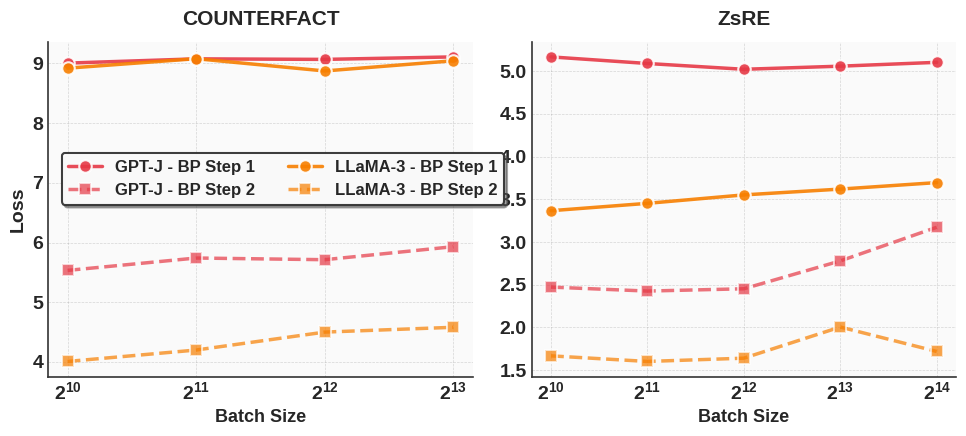

In [74]:
import matplotlib.pyplot as plt
data = models_l
# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
datasets_map = {"counterfact": "COUNTERFACT", "zsre": "ZsRE"}
# 优化的配色方案
colors = {
    'gptj': '#E63946',      # 鲜红色
    'llama-3-instruct': '#F77F00'  # 橙色
}

# 线型
linestyles = {
    'step1': '-',
    'step2': '--'
}

# 标记样式
markers = {
    'step1': 'o',
    'step2': 's'
}

model_map = {"gptj": "GPT-J", "llama-3-instruct": "LLaMA-3"}

handles_labels = []

for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    
    for model_idx, (model_name, model_data) in enumerate(data.items()):
        context_lengths = sorted([int(k) for k in model_data[dataset].keys()])
        values = [model_data[dataset][str(k)] for k in context_lengths]
        metric1 = [v[0] for v in values]
        metric2 = [v[1] for v in values]

        # BP Step 1
        l1, = ax.plot(context_lengths, metric1, 
                      label=f"{model_map[model_name]} - BP Step 1", 
                      color=colors[model_name], 
                      linestyle=linestyles['step1'], 
                      marker=markers['step1'], 
                      linewidth=2.5,
                      markersize=9,
                      markeredgewidth=1.5,
                      markeredgecolor='white',
                      alpha=0.9)
        
        # BP Step 2
        l2, = ax.plot(context_lengths, metric2, 
                      label=f"{model_map[model_name]} - BP Step 2", 
                      color=colors[model_name], 
                      linestyle=linestyles['step2'], 
                      marker=markers['step2'], 
                      linewidth=2.5,
                      markersize=9,
                      markeredgewidth=1.5,
                      markeredgecolor='white',
                      alpha=0.7)

        # 只在第一个子图中收集 legend
        if idx == 0:
            handles_labels.append((l1, f"{model_map[model_name]} - BP Step 1"))
            handles_labels.append((l2, f"{model_map[model_name]} - BP Step 2"))

    # 设置标题和标签
    ax.set_title(f"{datasets_map[dataset]}", fontsize=15, fontweight='bold', pad=12)
    ax.set_xlabel("Batch Size", fontsize=13, fontweight='bold')
    ax.set_xscale('log', base=2)
    ax.tick_params(axis='both', labelsize=14)
    
    # 优化网格
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, color='gray')
    ax.set_facecolor('#FAFAFA')
    
    # 美化边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#333')
        ax.spines[spine].set_linewidth(1.2)

# 设置左侧子图的y轴标签
axes[0].set_ylabel("Loss", fontsize=14, fontweight='bold')

# 创建统一的图例，放在底部中央
handles, labels = zip(*handles_labels)
legend = fig.legend(handles, labels, 
                   loc='lower center', 
                   ncol=2, 
                   bbox_to_anchor=(0.3, 0.5),
                   fontsize=12,
                   frameon=True,
                   shadow=True,
                   fancybox=True,
                   framealpha=0.95,
                   edgecolor='#333',
                   columnspacing=2.0)

# 添加总标题


plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.savefig("./figs/loss_varies1.pdf", dpi=300, bbox_inches='tight')
plt.show()

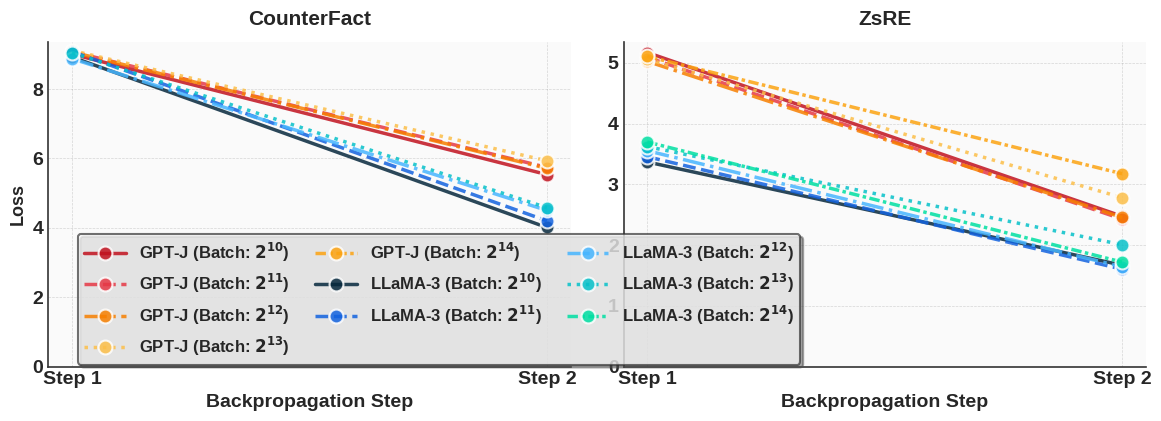

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 data 变量为 models_l (你需要确保这个变量在你的环境中已定义)
# data = models_l

steps = [1, 2]
step_labels = ['Step 1', 'Step 2']

# 优化的线型样式
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]

# 配色方案 - 使用渐变色系
color_palette_gptj = ['#C1121F', '#E63946', '#F77F00', '#FCBF49', '#FCA311']
color_palette_llama = ['#06283D', '#1363DF', '#47B5FF', '#06C1C9', '#00DFA2']

datasets = ['counterfact', 'zsre']
model_map = {'gptj': 'GPT-J', 'llama-3-instruct': 'LLaMA-3'}
datasets_map = {'counterfact': 'CounterFact', 'zsre': 'ZsRE'}
context_length_map = {
    "1024": r"$2^{10}$", 
    "2048": r"$2^{11}$", 
    "4096": r"$2^{12}$", 
    "8192": r"$2^{13}$", 
    "16384": r"$2^{14}$"
}

# 创建图形
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor('white')

all_context_lengths = sorted(set(int(k) for m in data.values() for d in m.values() for k in d.keys()))
if "16384" in data.get('gptj', {}).get('counterfact', {}):
    all_context_lengths = [cl for cl in all_context_lengths if cl != 16384]

legend_handles, legend_labels = [], []

for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    
    for model_idx, (model_name, model_data) in enumerate(data.items()):
        context_lengths = sorted([int(k) for k in model_data[dataset].keys()])
        
        # 选择对应模型的配色
        color_palette = color_palette_gptj if model_name == 'gptj' else color_palette_llama
        
        for bs_idx, context_length in enumerate(context_lengths):
            step1, step2 = model_data[dataset][str(context_length)]
            losses = [step1, step2]
            
            # 使用渐变颜色
            color_idx = bs_idx % len(color_palette)
            
            line = ax.plot(
                steps, losses,
                label=None,
                linestyle=linestyles[bs_idx % len(linestyles)],
                marker='o', 
                linewidth=2.5,
                markersize=10,
                markeredgewidth=1.5,
                markeredgecolor='white',
                color=color_palette[color_idx],
                alpha=0.85
            )[0]

            # 只在 zsre 数据集添加图例
            if dataset == 'zsre':
                legend_handles.append(line)
                legend_labels.append(
                    f"{model_map[model_name]} (Batch: {context_length_map[str(context_length)]})"
                )

    # 设置标题和标签
    ax.set_xticks(steps)
    ax.set_xticklabels(step_labels, fontsize=14)
    ax.set_title(f"{datasets_map[dataset]}", fontsize=15, fontweight='bold', pad=12)
    ax.set_xlabel("Backpropagation Step", fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', labelsize=14)
    
    # 优化网格
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, color='gray', zorder=0)
    ax.set_facecolor('#FAFAFA')
    
    # 美化边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#333')
        ax.spines[spine].set_linewidth(1.2)
    
    # 设置y轴范围，留出一些空间
    ax.set_ylim(bottom=0)

# 设置左侧子图的y轴标签
axes[0].set_ylabel("Loss", fontsize=13, fontweight='bold')

# 创建统一的图例，放在底部
legend = fig.legend(
    legend_handles, legend_labels, 
    loc='lower center', 
    ncol=3, 
    bbox_to_anchor=(0.38, 0.18),
    fontsize=12,
    frameon=True,
    shadow=True,
    fancybox=True,
    framealpha=0.7,
    edgecolor='#333',
    columnspacing=1.5,
    handlelength=2.5
)

# 添加总标题


plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.savefig("./figs/loss_varies2.pdf", dpi=300, bbox_inches='tight')
plt.show()